### We examine the relations between forces, encoders, steps, and positions
This test was done on Thursday night (3/4/20)

In [1]:
from openpyxl import load_workbook

from astropy.time import Time
from datetime import timedelta, datetime
from lsst_efd_client import EfdClient

import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
plt.jet()

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters();

In [2]:
start = Time('2020-03-05T23:25:00') #this is UTC
end = Time('2020-03-05T23:36:00') 

In [3]:
def readSqXlsx(c1,c2):
    wb = load_workbook(filename='M2basicTest.xlsx', read_only=True)
    ws = wb['Sheet1']
    data_rows = []
    for row in ws[c1:c2]:
        data_cols = []
        for cell in row:
            data_cols.append(cell.value)
        data_rows.append(data_cols)
    return np.array(data_rows)
def getSlope(x, y):
    return np.mean(y[1:]-y[:-1])/np.mean(x[1:]-x[:-1])
def getDelta(y):
    return np.mean(y[1:]-y[:-1])

#### We recorded some data in the Excel file by hand. Let's look at those first
Open loop: the input was A1 stroke 

In [4]:
aa = readSqXlsx('C23','N27')

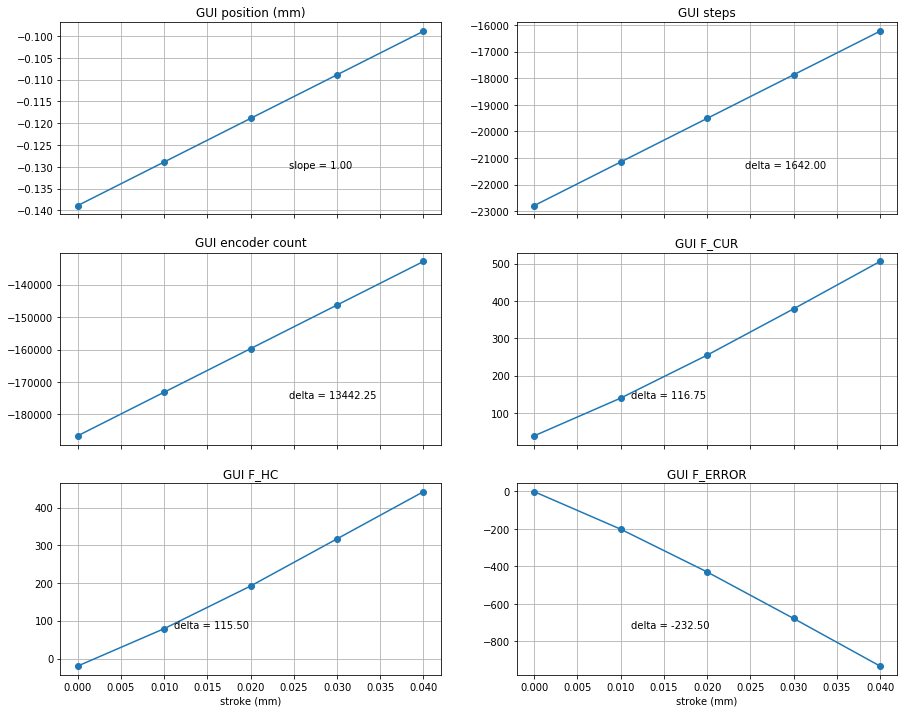

In [5]:
fig, ax = plt.subplots(3,2, figsize=(15, 3*4), sharex=True)
inmm = aa[:,0]
guimm = aa[:,1]
ax[0][0].plot(inmm, guimm,'-o')
ax[0][0].text(0.6, 0.24, "slope = %.2f"%getSlope(inmm, guimm), color = 'black', transform=ax[0][0].transAxes)
ax[0][0].grid()
ax[0][0].set_title('GUI position (mm)');

guisteps = aa[:,2]
ax[0][1].plot(inmm, guisteps,'-o')
ax[0][1].text(0.6, 0.24, "delta = %.2f"%getDelta(guisteps), color = 'black', transform=ax[0][1].transAxes)
ax[0][1].grid()
ax[0][1].set_title('GUI steps');

guiec = aa[:,3]
ax[1][0].plot(inmm, guiec,'-o')
ax[1][0].text(0.6, 0.24, "delta = %.2f"%getDelta(guiec), color = 'black', transform=ax[1][0].transAxes)
ax[1][0].grid()
ax[1][0].set_title('GUI encoder count');

#F_cmd in GUI does not change

guifcur = aa[:,5]
ax[1][1].plot(inmm, guifcur,'-o')
ax[1][1].text(0.3, 0.24, "delta = %.2f"%getDelta(guifcur), color = 'black', transform=ax[1][1].transAxes)
ax[1][1].grid()
ax[1][1].set_title('GUI F_CUR');

guifhc = aa[:,6]
ax[2][0].plot(inmm, guifhc,'-o')
ax[2][0].text(0.3, 0.24, "delta = %.2f"%getDelta(guifhc), color = 'black', transform=ax[2][0].transAxes)
ax[2][0].set_xlabel('stroke (mm)')
ax[2][0].set_title('GUI F_HC');
ax[2][0].grid()

guife = aa[:,7]
ax[2][1].plot(inmm, guife,'-o')
ax[2][1].text(0.3, 0.24, "delta = %.2f"%getDelta(guife), color = 'black', transform=ax[2][1].transAxes)
ax[2][1].set_xlabel('stroke (mm)')
ax[2][1].grid()
ax[2][1].set_title('GUI F_ERROR');

#EFD encoder position is same as GUI position.
#EFD F_CUR is same as GUI F_CUR

Questions
* EFD steps do not seem to change, checked EFD, it is NOT because of digits we were able to read from Chronograf.
* F_CMD seems to be LUT force. It doesn't change in this process. F_CUR is decreasing, it is the force being applied. F_HC doesn't make sense. Ignore it.

In [6]:
client = EfdClient('summit_efd')
csc_index = 1

In [7]:
start.tai

<Time object: scale='tai' format='isot' value=2020-03-05T23:25:37.000>

In [8]:
#known bug, M2 sends utc everywhere.
df = await client.select_time_series('lsst.sal.MTM2.tangentActuatorAbsolutePositionSteps', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df.head()

,private_host,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp,tangentLink0DegAbsolutePositionSteps,tangentLink120DegAbsolutePositionSteps,tangentLink180DegAbsolutePositionSteps,tangentLink240DegAbsolutePositionSteps,tangentLink300DegAbsolutePositionSteps,tangentLink60DegAbsolutePositionSteps
2020-03-05 23:25:00.003000+00:00,1,1.583451e+09,37859,1.583451e+09,c281983f,6193846,1.583451e+09,0,0,0,0,0,0
2020-03-05 23:25:00.053000+00:00,1,1.583451e+09,37859,1.583451e+09,c281983f,6193855,1.583451e+09,0,0,0,0,0,0
2020-03-05 23:25:00.103000+00:00,1,1.583451e+09,37859,1.583451e+09,c281983f,6193864,1.583451e+09,0,0,0,0,0,0
2020-03-05 23:25:00.153000+00:00,1,1.583451e+09,37859,1.583451e+09,c281983f,6193873,1.583451e+09,0,0,0,0,0,0
2020-03-05 23:25:00.210000+00:00,1,1.583451e+09,37859,1.583451e+09,c281983f,6193882,1.583451e+09,0,0,0,0,0,0


In [9]:
df.tail()

,private_host,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp,tangentLink0DegAbsolutePositionSteps,tangentLink120DegAbsolutePositionSteps,tangentLink180DegAbsolutePositionSteps,tangentLink240DegAbsolutePositionSteps,tangentLink300DegAbsolutePositionSteps,tangentLink60DegAbsolutePositionSteps
2020-03-05 23:35:59.759000+00:00,1,1.583451e+09,37859,1.583451e+09,c281983f,6313252,1.583451e+09,0,0,0,0,0,0
2020-03-05 23:35:59.807000+00:00,1,1.583451e+09,37859,1.583451e+09,c281983f,6313261,1.583451e+09,0,0,0,0,0,0
2020-03-05 23:35:59.857000+00:00,1,1.583451e+09,37859,1.583451e+09,c281983f,6313271,1.583451e+09,0,0,0,0,0,0
2020-03-05 23:35:59.906000+00:00,1,1.583451e+09,37859,1.583451e+09,c281983f,6313280,1.583451e+09,0,0,0,0,0,0
2020-03-05 23:35:59.957000+00:00,1,1.583451e+09,37859,1.583451e+09,c281983f,6313289,1.583451e+09,0,0,0,0,0,0


### Answer to first questin above: Not sure what is going on. EFD does show this is 0 everywhere.

In [10]:
df = await client.select_time_series('lsst.sal.MTM2.tangentForcesMeasured', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df.head()

,private_host,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp,tangentLink0DegForceMeasured,tangentLink120DegForceMeasured,tangentLink180DegForceMeasured,tangentLink240DegForceMeasured,tangentLink300DegForceMeasured,tangentLink60DegForceMeasured
2020-03-05 23:25:00.001000+00:00,1,1.583451e+09,37859,1.583451e+09,b4501b3e,6193844,1.583451e+09,39.586197,11.524448,-3.236062,30.765368,4.642173,-120.104073
2020-03-05 23:25:00.051000+00:00,1,1.583451e+09,37859,1.583451e+09,b4501b3e,6193853,1.583451e+09,38.132011,10.716660,-3.074259,32.002438,3.886470,-120.534554
2020-03-05 23:25:00.101000+00:00,1,1.583451e+09,37859,1.583451e+09,b4501b3e,6193862,1.583451e+09,39.209187,11.039775,-3.451799,31.464581,4.804109,-121.234085
2020-03-05 23:25:00.151000+00:00,1,1.583451e+09,37859,1.583451e+09,b4501b3e,6193871,1.583451e+09,38.724457,9.855019,-2.157375,31.625937,4.912066,-119.835022
2020-03-05 23:25:00.205000+00:00,1,1.583451e+09,37859,1.583451e+09,b4501b3e,6193880,1.583451e+09,39.640057,9.962724,-3.667537,31.894865,4.534215,-119.996452


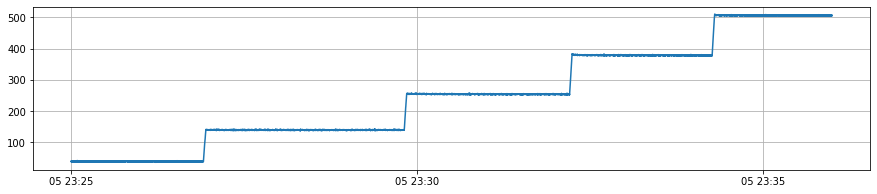

In [11]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.tangentLink0DegForceMeasured)
plt.grid();
#forces on B1 are consistent between EFD and GUI

In [12]:
mat = scipy.io.loadmat('mat/0305/CellTelemetry_2020-03-05_203926_003.mat')
print(mat['data'].dtype.names)
mdata = mat['data']  # variable in mat file
mdtype = mdata.dtype  # dtypes of structures are "unsized objects"
ndata = {n: mdata[n][0, 0] for n in mdtype.names}
t = [datetime.strptime(ts[0][0], '%d-%b-%Y %H:%M:%S.%f') for ts in ndata['timestamp']]
t = np.array([ti+ timedelta(hours=4, minutes=3, seconds=-5) for ti in t]) #convert to utc, 4 hours ahead of Rochester
columns = [n for n, v in ndata.items()]
nonHP = [i for i in range(78) if i+1 not in ndata['hp'][0,:]]
nonHPa = [i for i in range(72) if i+1 not in ndata['hp'][0,:]] #a for axial actuator only

def insertHPColumns(a):
    [n1, n2] = a.shape
    b = np.zeros((n1, n2+6))
    ii = 0
    for i in range(n2+6):
        if i in nonHP:
            b[:,i] = a[:,ii]
            ii += 1
        else:
            b[:,i] = 0
    return b

ndata['f_hp'] = insertHPColumns(ndata['f_hp'])
ndata['f_error'] = insertHPColumns(ndata['f_error'])

('time_delta', 'comm_cntr', 'ilc_status', 'encoder', 'force', 'disp_sensors', 'temp_sensors', 'inclinometer', 'step_cmd', 'inc_cal', 'elevation_ts_i', 'elevation_ts_u', 'elevation_ang', 'el_status', 'disp_proc', 'disp_status', 'temp_proc', 'temp_status', 'hp', 'f_e', 'f_0', 'f_a', 'f_f', 'T_u', 'T_x', 'T_y', 'T_r', 'f_hp', 'f_cmd', 'f_error', 'f_delta', 'f_cmd_wrd', 'mtr_voltage', 'comm_voltage', 'mtr_current', 'comm_current', 'dig_input', 'dig_output', 'mtr_voltage_proc', 'comm_voltage_proc', 'mtr_current_proc', 'comm_current_proc', 'time', 'timestamp')


In [13]:
#This starting time is now consistent with binary file name as well
t[0]

datetime.datetime(2020, 3, 5, 23, 9, 27, 730000)

In [14]:
nn = len(t)
print('%d, time duration = %.0f minutes'%(nn, nn/20/60))

58083, time duration = 48 minutes


In [15]:
# cut out only the time period we are interested in
idx = (t>start) & (t<end)
data = {}
for n, v in ndata.items():
    if len(v.shape)>1:
        data[n] = v[idx,:]
    else:
        data[n] = v[idx]
t = t[idx]

### Now EFD force data match the binary force

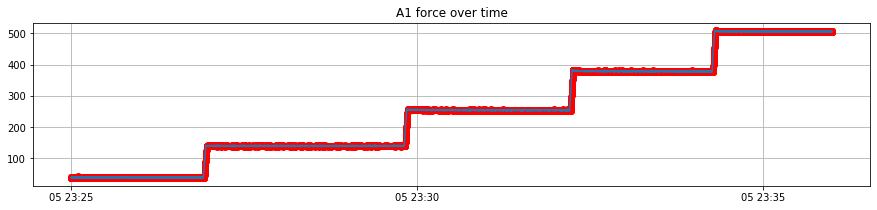

In [16]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t, data['force'][:,72],'-ro')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.tangentLink0DegForceMeasured)
plt.title('A1 force over time')
plt.grid();

In [50]:
aa = np.loadtxt('../github/data/M2_1um_72_force.txt')
# to have +x going to right, and +y going up, we need to transpose and reverse x and y
xact = -aa[:,2]
yact = -aa[:,1]
R_tangent = 1.71 #use M2 outer radius for now; in meter

def getFxyzMxyz(F, xact, yact, R_tangent):
    '''
    input: force vector with 78 force values
    output: net forces Fx,Fy,Fz, net moments Mx, My, Mz
    '''
    Fz = sum(F[:72])
    Fx = F[72] - F[75] + (F[73]-F[74]-F[76]+F[77])*0.5
    Fy = (-F[73]-F[74]+F[76]+F[77])*1.732/2
    Mx = sum(F[:72]*yact)
    My = sum(-F[:72]*xact)
    Mz = sum(F[72:])*R_tangent
    
    return Fx, Fy, Fz, Mx, My, Mz

-37.18539619445801 126.55808971691131 15577.53596496582 60.836085106769275 -30.489176205755584 -67.47435733079911
-33.05047845840454 131.8294279079437 15580.141098022461 64.58821403416306 -29.04891893889821 -62.919908380508424


#### Compare total forces and moments at the begining and the end

In [51]:
Fx, Fy, Fz, Mx, My, Mz = getFxyzMxyz(data['force'][0,:], xact,yact, R_tangent)
print(Fx, Fy, Fz, Mx, My, Mz)
Fx, Fy, Fz, Mx, My, Mz = getFxyzMxyz(data['force'][-1,:], xact,yact, R_tangent)
print(Fx, Fy, Fz, Mx, My, Mz)

-37.18539619445801 126.55808971691131 15577.53596496582 60.836085106769275 -30.489176205755584 -67.47435733079911
-33.05047845840454 131.8294279079437 15580.141098022461 64.58821403416306 -29.04891893889821 -62.919908380508424


#### All tangent actuators forces, EFD vs. binary, over 5s

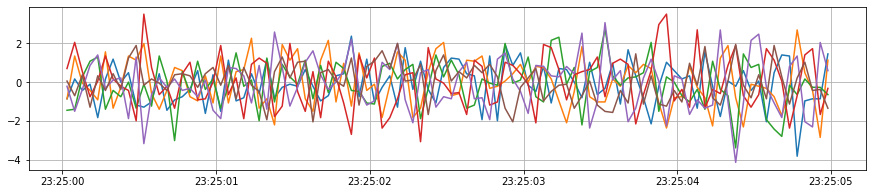

In [27]:
fig, ax = plt.subplots(figsize=(15,3))
for i in range(72,78):
    plt.plot(t[:100], data['force'][:100,i]-np.array(df['tangentLink%dDegForceMeasured'%((i-72)*60)][:100]))
plt.grid();

#### When we looked at the GUI, it appeared that F_CMD - F_CUR - F_HC = F_ERROR. Is that always true?
No, see below

A1, F_HC[0] = -20.32, residual[0] = 0.00
A3, F_HC[0] = -14.52, residual[0] = 0.00
A5, F_HC[0] = -37.43, residual[0] = -0.00


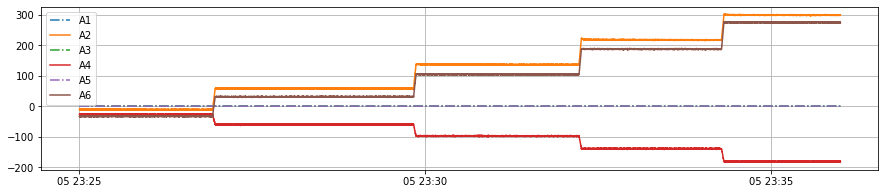

In [57]:
fig, ax = plt.subplots(figsize=(15,3))
for i in range(72,78):
    aa = data['f_cmd'][:,i] - data['force'][:,i] - data['f_hp'][:,i]-data['f_error'][:,i]
    if i%2 == 0:
        bb = '-.'
    else:
        bb = '-'
    plt.plot(t, aa, bb, label = 'A%d'%(i-71))
    if (max(abs(aa))<10) :
        print('A%d, F_HC[0] = %.2f, residual[0] = %.2f'%(i-71, data['f_hp'][0,i], aa[0]))
plt.grid()
plt.legend()
plt.jet()

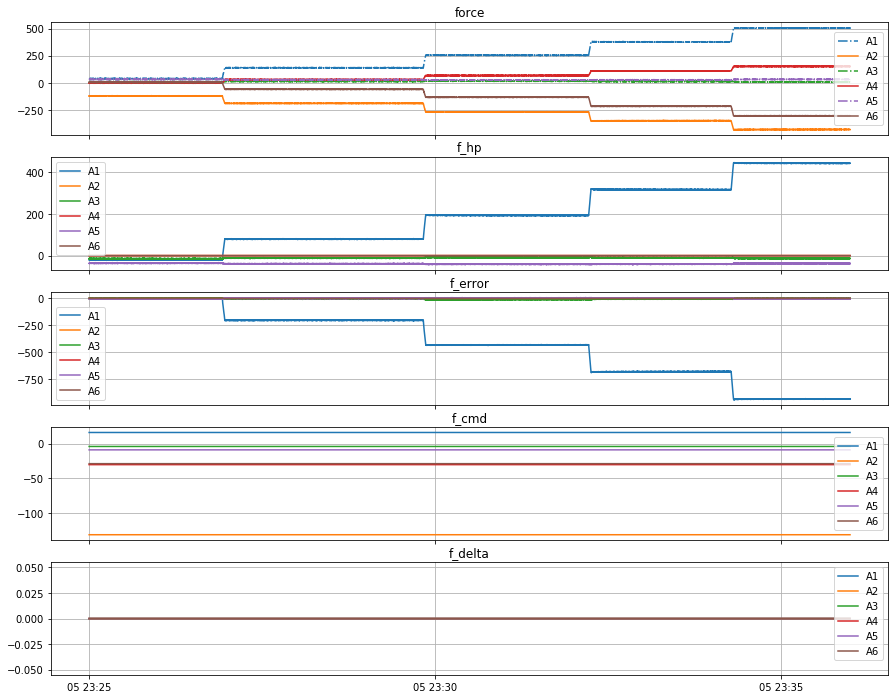

In [56]:
fig, ax = plt.subplots(5,1, sharex=True, figsize=(15,12))
for i in range(72,78):
    if i%2 == 0:
        bb = '-.'
    else:
        bb = '-'
    ax[0].plot(t, data['force'][:,i], bb, label = 'A%d'%(i-71) )
ax[0].grid()
ax[0].legend()
ax[0].set_title('force')

for i in range(72,78):
    ax[1].plot(t, data['f_hp'][:,i] , label = 'A%d'%(i-71))
ax[1].grid()
ax[1].legend()
ax[1].set_title('f_hp')

for i in range(72,78):
    ax[2].plot(t, data['f_error'][:,i], label = 'A%d'%(i-71) )
ax[2].grid()
ax[2].legend()
ax[2].set_title('f_error')

for i in range(72,78):
    ax[3].plot(t, data['f_cmd'][:,i], label = 'A%d'%(i-71) )
ax[3].grid()
ax[3].legend()
ax[3].set_title('f_cmd')

for i in range(72,78):
    ax[4].plot(t, data['f_delta'][:,i], label = 'A%d'%(i-71) )
ax[4].grid()
ax[4].legend()
ax[4].set_title('f_delta');
#fig.subplots_adjust(hspace=0)

### From the above -
* A1 is increasing. A3 and A5 are the other two active links. They do not do anything.
* A2, A4, A6 are passively responding. 
    * A4 is opposite of A1, so it increases to counter A1 force change.
    * A2 and A6 both have x-components in the same direction of A1. So they decrease in magnitude to counter A1 increase.

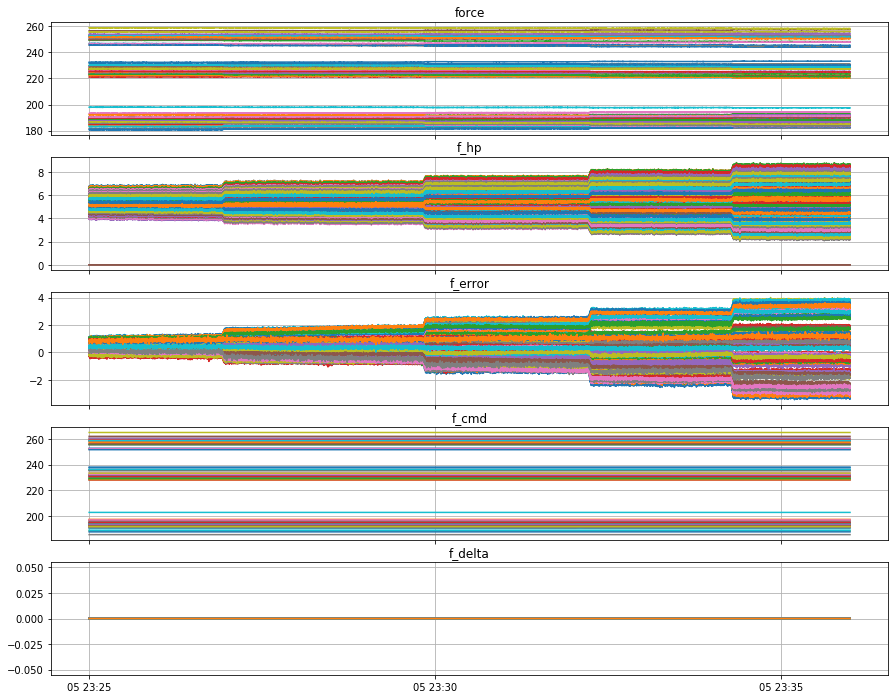

In [49]:
fig, ax = plt.subplots(5,1, sharex=True, figsize=(15,12))
for i in range(72):
    ax[0].plot(t, data['force'][:,i] )
ax[0].grid()
ax[0].set_title('force')

for i in range(72):
    ax[1].plot(t, data['f_hp'][:,i] )
ax[1].grid()
ax[1].set_title('f_hp')

for i in range(72):
    ax[2].plot(t, data['f_error'][:,i] )
ax[2].grid()
ax[2].set_title('f_error')

for i in range(72):
    ax[3].plot(t, data['f_cmd'][:,i] )
ax[3].grid()
ax[3].set_title('f_cmd')

for i in range(72):
    ax[4].plot(t, data['f_delta'][:,i] )
ax[4].grid()
ax[4].set_title('f_delta');
#fig.subplots_adjust(hspace=0)

sum = 296.85 N


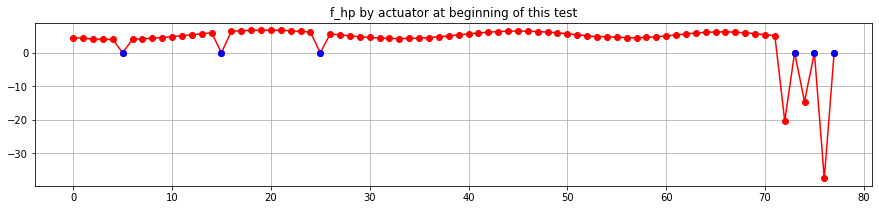

In [42]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(data['f_hp'][0,:],'-ro')
plt.plot(data['hp'][0]-1, data['f_hp'][0,data['hp'][0]-1],'bo',label='HP') #color HP with blue
plt.grid()
plt.title('f_hp by actuator at beginning of this test')
print('sum = %.2f N'%sum(data['f_hp'][0,:]))
#sh*t, word doc says F_HC = f_hp, but why it is not zero on B6,16,26??? what is going on with last 3 actuators???

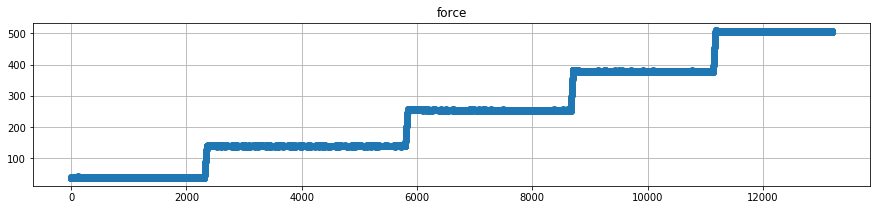

In [44]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(data['force'][:,72],'-o')
plt.title('force')
plt.grid() 

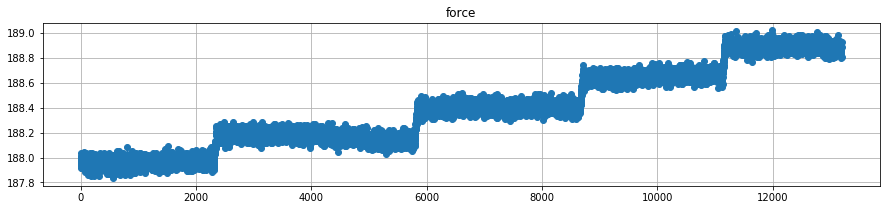

In [46]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(data['force'][:,0],'-o')
plt.title('force')
plt.grid() 

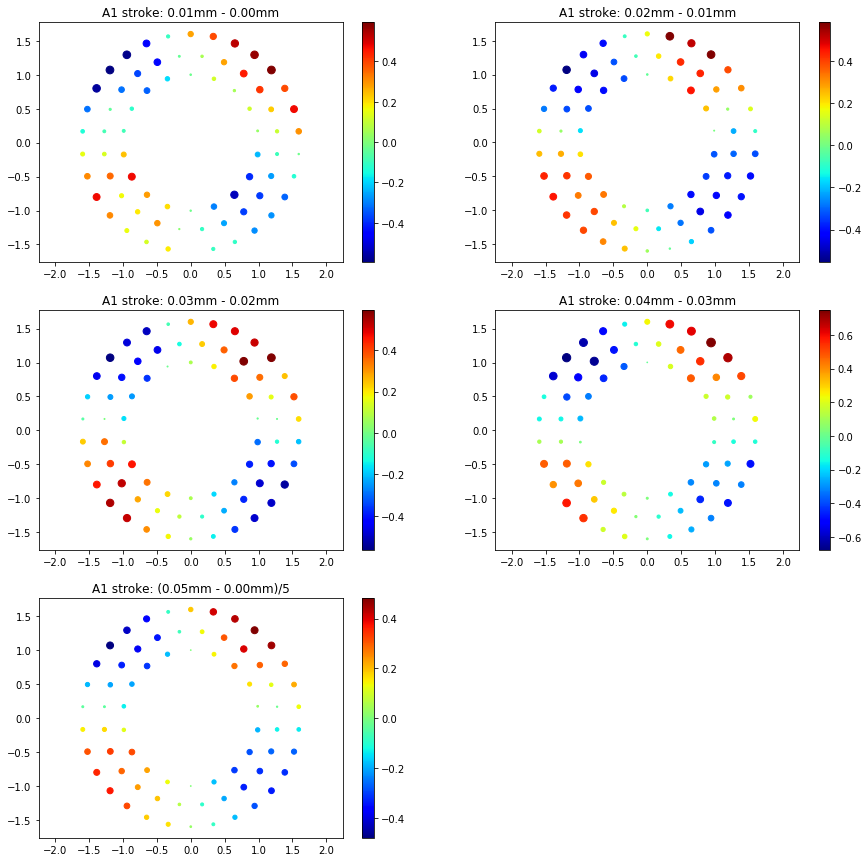

In [67]:
fig, ax = plt.subplots(3,2, figsize=(15,15))
idx = [0, 4000, 7000, 10000, 12000]
for i in range(5):
    irow = np.int8(i/2)
    icol = np.mod(i,2)
    if i<4:
        aa = data['force'][idx[i+1],:72]- data['force'][idx[i],:72] 
        bb = 'A1 stroke: %.2fmm - %.2fmm'%(0.01*(i+1), 0.01*i)
    else:
        aa = (data['force'][idx[-1],:72]- data['force'][idx[0],:72] )/5
        bb ='A1 stroke: (0.05mm - 0.00mm)/5'
    img = ax[irow][icol].scatter(xact, yact, c=aa, s=abs(aa)*100)
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].axis('equal')
    ax[irow][icol].set_title(bb)
fig.delaxes(ax.flatten()[-1])

### From the above -
* A1 increases, A4 increases, A2 and A6 decreases, all to counter A1 increase. 
* interestingly, the axial actuators respond by creating a astigmatism shape. Why?
* The astigmatic forces do not create any net force for moments. How are these created?
* Do these have anything to do with LTS-146 Sec 3.5.9?

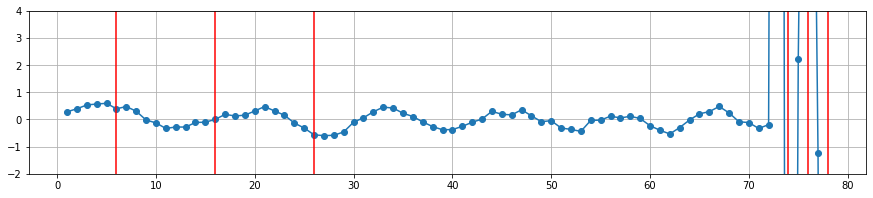

In [47]:
x0 = np.linspace(1,78, 78)
aa = data['force'][4000,:]- data['force'][0,:] 
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(x0,aa,'-o')
plt.grid()
yy=[-2, 4]
plt.ylim(yy)
for i in data['hp'][0]:
    plt.plot([i,i],yy,'-r')
#ax.set_xticklabels(actLabels)

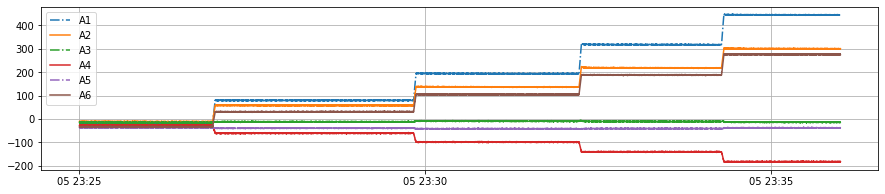

In [63]:
fig, ax = plt.subplots(figsize=(15,3))
for i in range(72,78):
    if i%2 == 0:
        bb = '-.'
    else:
        bb = '-'
    aa = data['f_cmd'][:,i] - data['force'][:,i] -data['f_error'][:,i] #- data['f_hp'][:,i]#
    plt.plot(t, aa, bb, label = 'A%d'%(i-71))
plt.legend()
plt.grid()

### This is our understanding from this test: (this test is very similar to a01_OL_stroke.ipynb, the only difference is that we commanded A1 instead of B1)
* stroke = position
* stroke and position are proportional to steps and encoder, 
    * each micron is 160 steps, or 1350 encoder count
* stroke and position are inversely proportional to forces (M2 facing down)
    * each micron is ~10N
* M2 FB system seems to be working, but f_hp is useless, so are f_error and f_delta.